In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

from scipy.io import loadmat

In [6]:
eeg_data = loadmat('/Volumes/Data/BUAA/dataset/DEAP/data_preprocessed_matlab/s01.mat')
eeg_signal = eeg_data['data'][0,0,:]
print(eeg_signal.shape)

(8064,)


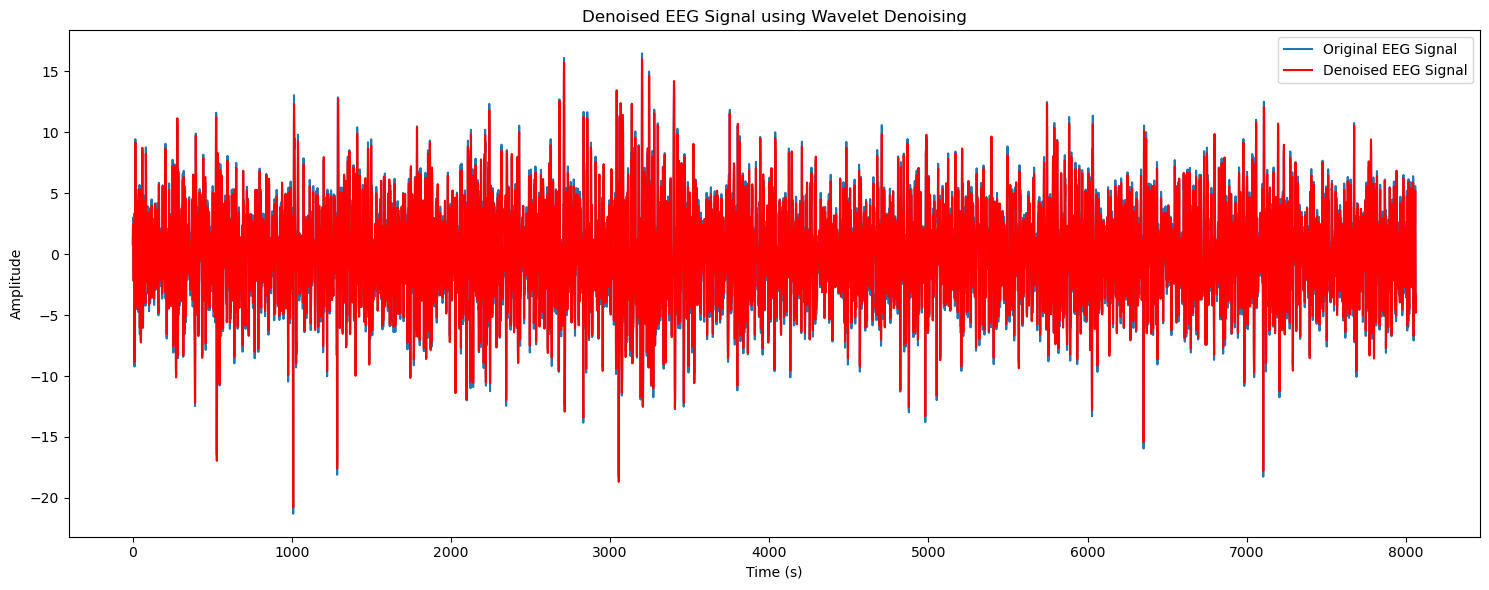

In [11]:

# 小波去噪处理
coeffs = pywt.wavedec(eeg_signal, 'db4', level=4)  # 使用Daubechies小波进行小波分解
# coeffs包含每层的小波分解
threshold = pywt.threshold(coeffs[-1], np.std(coeffs[-1])/2, mode='soft')  # 计算阈值并应用软阈值
coeffs[-1] = threshold  # 更新高频系数
denoised_signal = pywt.waverec(coeffs, 'db4')  # 小波重构去噪后的信号

# 绘制原始信号和去噪后的信号
plt.figure(figsize=(15, 6))
# plt.subplot(2, 1, 1)
plt.plot(range(8064), eeg_signal, label='Original EEG Signal')
#plt.title('Original EEG Signal')
#plt.xlabel('Time (s)')
#plt.ylabel('Amplitude')
plt.legend()

# plt.subplot(2, 1, 2)
plt.plot(range(8064), denoised_signal, label='Denoised EEG Signal', color='red')
plt.title('Denoised EEG Signal using Wavelet Denoising')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()


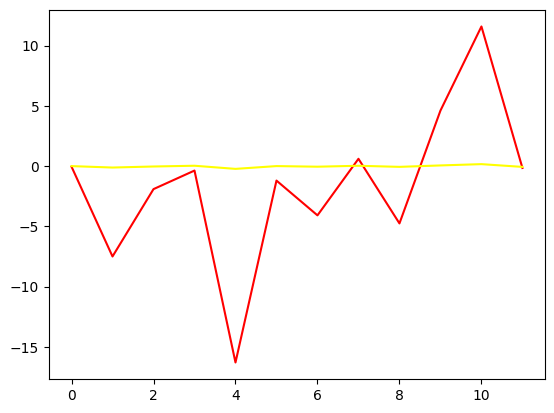

In [4]:
import numpy as np
import matplotlib.pyplot as plt
data = np.load('../Data/len_12/s24/data.npy')
label = np.load('../Data/len_12/s24/label.npy')
smt_data = np.load('../Data/smooth_DEAP/s24/data.npy')
plt.plot(range(12), data[0,1,2,:], label='EEG Signal', color='red')
plt.plot(range(12), smt_data[0,1,2,:], label='EEG Signal', color='yellow')